In [ ]:
from google.colab import drive

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
def cekErosi(temp,element):
    """membuat potongan matriks yang diperiksa menjadi 1 dimensi"""
    temp = temp.ravel()
    for i in range(len(temp)):
      """jika piksel element bernilai 1 akan tetapi piksel potongan matriks yang 
      diperiksa tidak sama dengan satu maka return false"""
      if(element[i] == 1 and temp[i] != 1): 
        return False
    """ jika semua bernilai True maka penambahan piksel dapat dilakukan (True)"""
    return True

def erosi(citra,kernel):
    tinggi, lebar = kernel.shape
    tinggi, lebar = tinggi//2, lebar//2
    result = np.zeros(citra.shape,np.uint8)  #mendeklarasi citra hasil
    pad = np.pad(citra,(tinggi, lebar),mode='edge') #memberikan padding pada citra
    kernel = kernel.ravel()
    for i in range(tinggi,len(pad)-tinggi):  #melakukan perulangan pada nilai asal citra yg telah di padding
        for j in range(lebar,len(pad[i])-lebar):  #melakukan perulangan pada nilai asal citra yang telah dipadding
            temp = pad[i-tinggi:i+tinggi+1,j-lebar:j+lebar+1] #diambil potongan matriks sesuai ukuran kernel dari citra yang telah dipadding
            cek = cekErosi(temp,kernel) 
            if(cek):
              result[i-tinggi][j-lebar] = 1
    return result #return result

def dilasi(citra,element):
    tinggi, lebar = element.shape
    tinggi, lebar = tinggi//2, lebar//2
    result = np.zeros(citra.shape,np.uint8) #mendeklarasi citra hasil
    pad = np.pad(citra,(tinggi,lebar),mode='constant') #memberikan padding pada citra
    for i in range(tinggi,len(pad)-tinggi):  #melakukan perulangan pada baris nilai asal citra yg telah di padding
        for j in range(lebar,len(pad[i])-lebar):  #melakukan perulangan pada kolom nilai asal citra yg telah di padding
            temp = pad[i-tinggi:i+tinggi+1,j-lebar:j+lebar+1] #diambil potongan matriks sesuai ukuran kernel dari citra yang telah dipadding
            cek = (temp == 1) & (element == 1) 
            if(np.any(cek)): #jika terdapat piksel dimana element bernilai satu dan potongan matriks juga bernilai satu 
              result[i-tinggi][j-lebar] = 1 #maka pixel origin citra diberi nilai 1
    return result 

def opening(im,element):
  return dilasi(erosi(im,element),element)

def closing(im,element):
  return erosi(dilasi(im,element),element)

In [ ]:
# mendefinisikan elips structure element
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
element

In [ ]:
from google.colab import files

In [ ]:
#files.download('/content/drive/MyDrive/Colab Notebooks/img/color_segmented/')

In [ ]:
# print (os.listdir('/content/drive/MyDrive/Colab Notebooks/img/color_segmented/'))

In [ ]:
#load black and white images
imgpath ='/content/drive/MyDrive/Colab Notebooks/img/color_segmented/'
imgbank = []
labels = []
i = 0
for filename in os.listdir(imgpath):
    imgbank.append(cv2.imread(imgpath+filename))
    imgbank[i] = cv2.cvtColor(imgbank[i],cv2.COLOR_BGR2RGB)
    labels.append(filename)
    i+=1

In [ ]:
labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load original images
imgpath = '/content/drive/MyDrive/Colab Notebooks/img/resized/'
original = []
i = 0
for filename in os.listdir(imgpath):
    original.append(cv2.imread(imgpath+filename))
    original[i] = cv2.cvtColor(original[i],cv2.COLOR_BGR2RGB)
    i+=1

In [ ]:
#
def subplot(imgbank, labels):
  fig, axs = plt.subplots(1,len(imgbank), figsize = (24,32))#jumlah baris, jumlah kolom, ukuran gambar
  for i in range(len(imgbank)):
    axs[i].imshow(imgbank[i],"gray")#menampilkan gambar
    axs[i].set_title(labels[i])

In [ ]:
subplot(imgbank, labels)

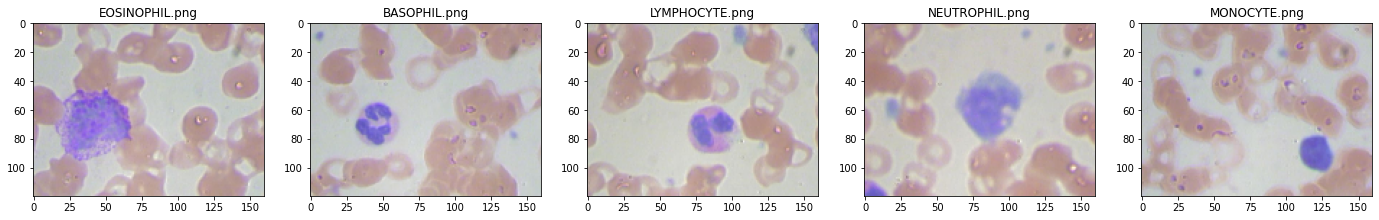

In [ ]:
subplot(original, labels)

In [ ]:
#convert to grayscale
def gray(img):#bgr
    img = 0.2989 * img[...,0] + 0.5870 * img[...,1] + 0.1140 * img[...,2] 
    return img

In [ ]:
gray_img = []
for img in original:#ori atau imgbank
      gray_img.append(gray(img))

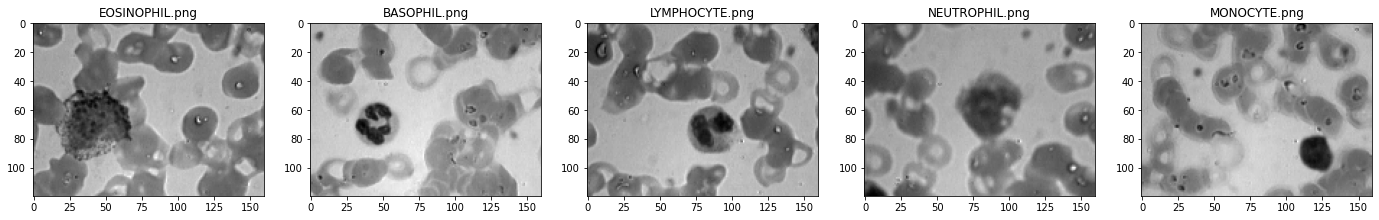

In [ ]:
subplot(gray_img, labels)

In [ ]:
def normalisasi(citra):
  min = np.min(citra)
  max = np.max(citra)
  return np.round((citra-min)*1/(max-min))

In [ ]:
def threshold(img,T = 147):#127
  if(len(img.shape)>2):#
    print("masukkan gambar abu-abu atau gambar dengan dua channel") 
    return img
  else:
    img[img>T] =255
    img[img<=T] = 0
  return normalisasi(img)

In [ ]:
thresh = []
for img in gray_img:
    thresh.append(threshold(img))

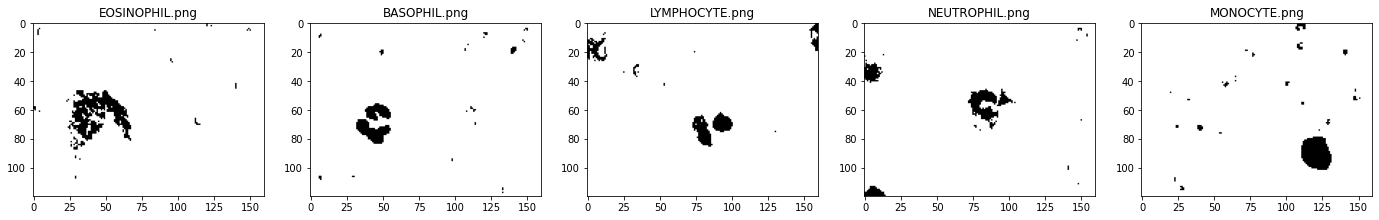

In [ ]:
subplot(thresh, labels)

In [ ]:
erosion_img = []
dilation_img = []
opening_img = []
closing_img = []


In [ ]:
for img in thresh:
    erosion_img.append(erosi(img, element))
    dilation_img.append(dilasi(img, element)) 

In [ ]:
#opening
for img in erosion_img:
    opening_img.append(dilasi(img, element))

#closing
for img in dilation_img:
    closing_img.append(erosi(img, element))
        

In [ ]:
print("hasil erosi : ")
subplot(erosion_img, labels)

In [ ]:
print("hasil dilasi : ")
subplot(dilation_img, labels)

In [ ]:
print("hasil opening : ")
subplot(opening_img, labels)

In [ ]:
print("hasil closing : ")
subplot(closing_img, labels)